In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

<AxesSubplot:>

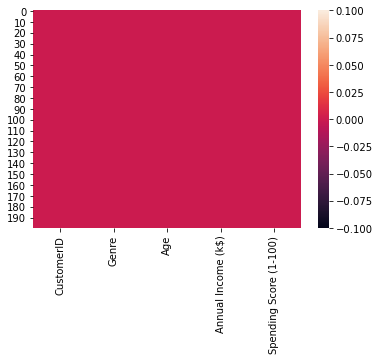

In [8]:
sns.heatmap(df.isnull())

<AxesSubplot:>

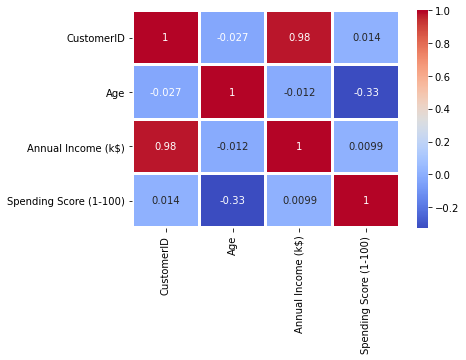

In [9]:
sns.heatmap(df.corr() ,annot=True, cmap='coolwarm',linewidths=2,linecolor='white',)

In [10]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.drop(['CustomerID','Genre'],axis=1,inplace=True)

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

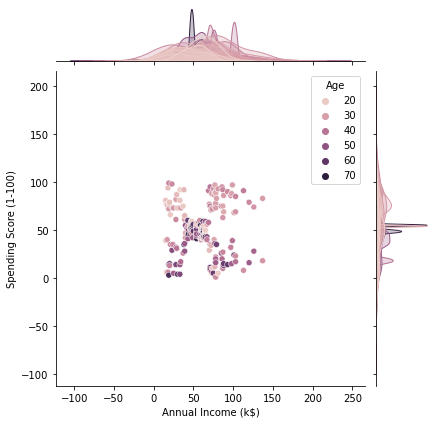

In [13]:
sns.jointplot(x='Annual Income (k$)', y ='Spending Score (1-100)' ,hue='Age', data = df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

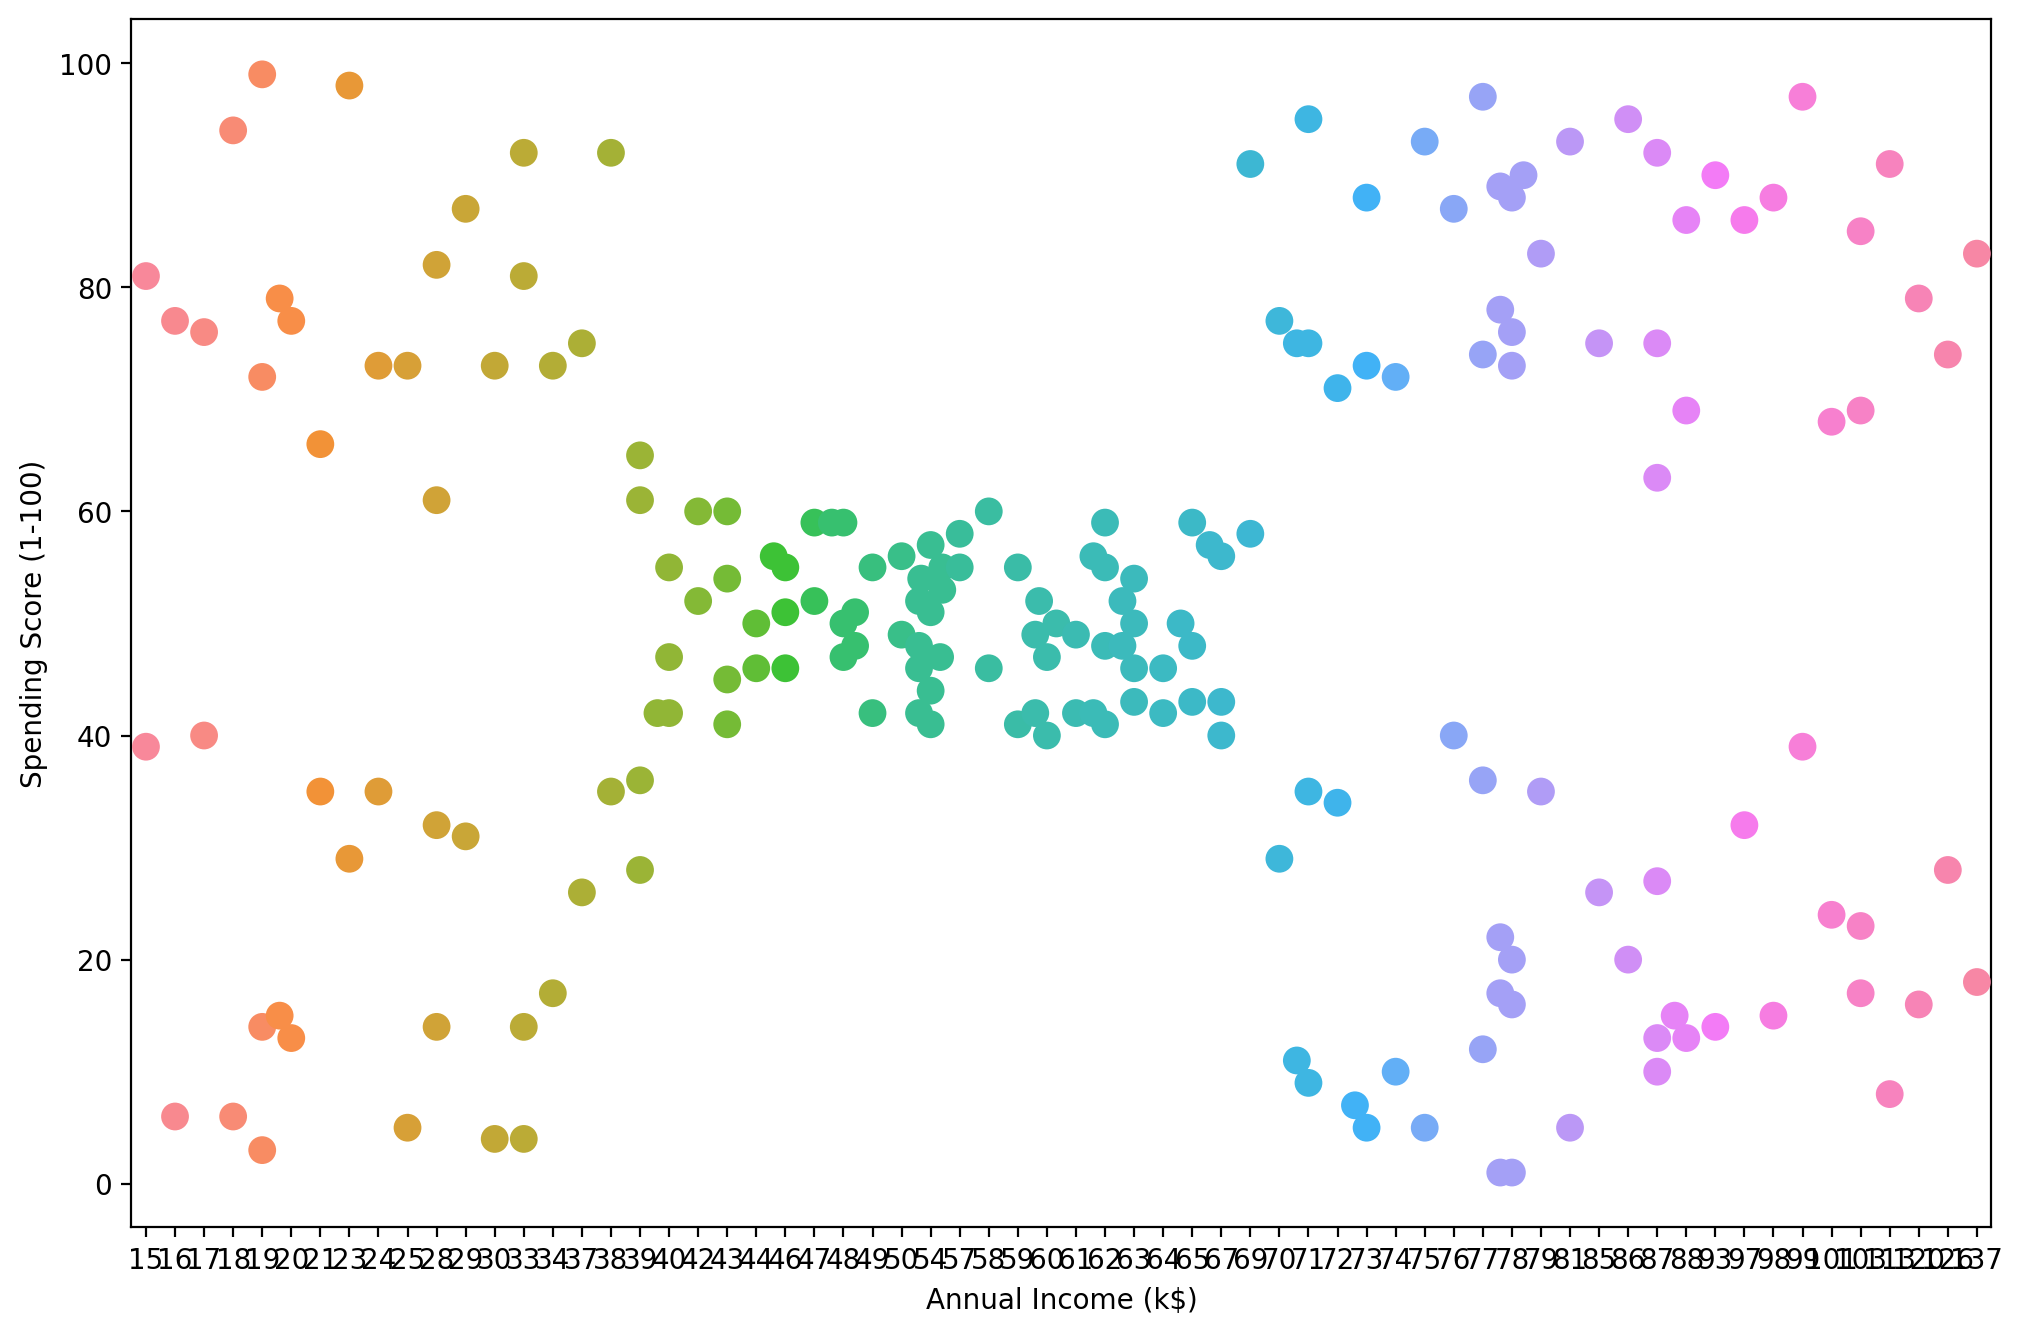

In [14]:

plt.figure(figsize=(12,8) ,dpi=200)
sns.swarmplot(x='Annual Income (k$)', y ='Spending Score (1-100)' , data = df ,size=10 )

In [15]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
from sklearn.cluster import KMeans

In [17]:
km=KMeans(n_clusters=200)

In [18]:
km.fit(df)

KMeans(n_clusters=200)

In [19]:
km.inertia_

0.0

In [20]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
km.inertia_

37492.20064935064

In [22]:
wcss

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58300.443321590676,
 51084.50595493435,
 44309.83640371743,
 41070.300430353964,
 37492.20064935064]

Text(0.5, 1.0, 'CHART')

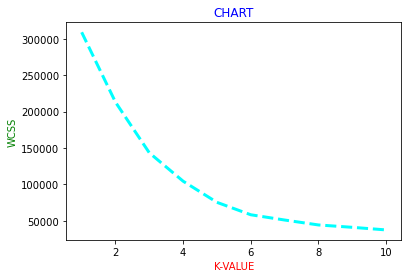

In [44]:
plt.plot(range(1,11),wcss,color='cyan' , lw=3, ls='dashed')
plt.xlabel('K-VALUE',color='red')
plt.ylabel('WCSS',color='green')
plt.time
plt.title( 'CHART',color='blue')

In [24]:
km=KMeans(n_clusters=5)

In [25]:
km.fit(df)

KMeans(n_clusters=5)

In [26]:
y=km.fit_predict(df)

In [27]:
y

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [28]:
centroid = km.cluster_centers_

In [29]:
centroid

array([[43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [30]:
x=df.values

In [31]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

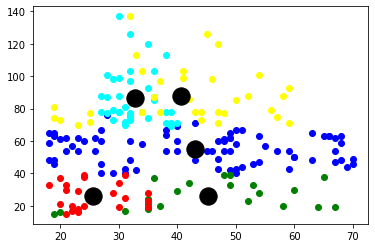

In [32]:
plt.scatter(x[y==0,0], x[y==0,1],c='blue')
plt.scatter(x[y==1,0], x[y==1,1],c='green')
plt.scatter(x[y==2,0], x[y==2,1],c='cyan')
plt.scatter(x[y==3,0], x[y==3,1],c='yellow')
plt.scatter(x[y==4,0], x[y==4,1],c='red')
plt.scatter(centroid[:,0],centroid[:,1],s=300,c='black')

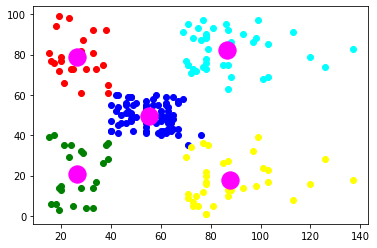

In [33]:
plt.scatter(x[y==0,1], x[y==0,2],c='blue')
plt.scatter(x[y==1,1], x[y==1,2],c='green')
plt.scatter(x[y==2,1], x[y==2,2],c='cyan')
plt.scatter(x[y==3,1], x[y==3,2],c='yellow')
plt.scatter(x[y==4,1], x[y==4,2],c='red')
plt.scatter(centroid[:,1],centroid[:,2],s=300,c='magenta')

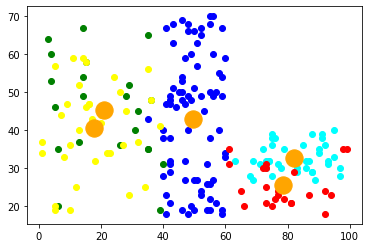

In [34]:
plt.scatter(x[y==0,2], x[y==0,0],c='blue')
plt.scatter(x[y==1,2], x[y==1,0],c='green')
plt.scatter(x[y==2,2], x[y==2,0],c='cyan')
plt.scatter(x[y==3,2], x[y==3,0],c='yellow')
plt.scatter(x[y==4,2], x[y==4,0],c='red')
plt.scatter(centroid[:,2],centroid[:,0],s=300,c='orange')

In [35]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [36]:

df['cluster'] = y

In [38]:
df

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


In [39]:
df['cluster_means'] = df['cluster'].replace((0,1,2,3,4),('HIGH AI, LOW SS','MEDIUM AI,Medium SS','LOW AI,LOW SS','LOW AI, HIGH SS','HIGH AI,HIGH SS'))

In [40]:
df

,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_means
0,19,15,39,4,"HIGH AI,HIGH SS"
1,21,15,81,3,"LOW AI, HIGH SS"
2,20,16,6,4,"HIGH AI,HIGH SS"
3,23,16,77,3,"LOW AI, HIGH SS"
4,31,17,40,4,"HIGH AI,HIGH SS"
...,...,...,...,...,...
195,35,120,79,1,"MEDIUM AI,Medium SS"
196,45,126,28,2,"LOW AI,LOW SS"
197,32,126,74,1,"MEDIUM AI,Medium SS"
198,32,137,18,2,"LOW AI,LOW SS"
